# 検証ログとテストログを読み込む

In [22]:
import json
import numpy as np

model_name = "RFEN_26_22_12_proposal_B"

eval_data = open("./log/{}/valid_log/json_log/json_log.json".format(model_name), 'r',encoding="utf-8_sig")
valid_eval_json_load = json.load(eval_data)
print(valid_eval_json_load.keys())

import json
import numpy as np
eval_data = open("./log/{}/test_log/json_log/json_log.json".format(model_name), 'r',encoding="utf-8_sig")
test_eval_json_load = json.load(eval_data)
print(test_eval_json_load.keys())

log_data = open("./log/{}/log.json".format(model_name), 'r',encoding="utf-8_sig")
log_data = json.load(log_data)

def evaluation(cm):
    recall = []
    precision = []
    f1 = []
    accuracy = []
    
    for i in range(len(cm)):
        one_recall = cm[i][1][1] / (cm[i][1][1] + cm[i][1][0])
        one_precision = cm[i][1][1] / (cm[i][1][1] + cm[i][0][1])
        one_f1 = 2 * cm[i][1][1] / (2 * cm[i][1][1] + cm[i][0][1] + cm[i][1][0])
        one_accuracy = (cm[i][1][1] + cm[i][0][0]) /(cm[i][1][1] + cm[i][0][0] + cm[i][0][1] + cm[i][1][0])
        
        recall.append(one_recall)
        precision.append(one_precision)
        f1.append(one_f1)
        accuracy.append(one_accuracy)
    return recall, precision, f1, accuracy

dict_keys(['valid_loss', 'micro_valid_recall', 'micro_valid_precision', 'micro_valid_f1', 'micro_valid_accuracy', 'macro_valid_recall', 'macro_valid_precision', 'macro_valid_f1', 'macro_valid_accuracy', 'cm'])
dict_keys(['micro_test_recall', 'micro_test_precision', 'micro_test_f1', 'micro_test_accuracy', 'macro_test_recall', 'macro_test_precision', 'macro_test_f1', 'macro_test_accuracy', 'test_each_f1_list', 'cm'])


# 検証データに対する評価値(f1,recall,precision)の推移, 検証におけるf1値が最大となったepochの回数を取得

60
検証データのmacroF1の最高値のepochは 29
評価値は 0.5329814333440277


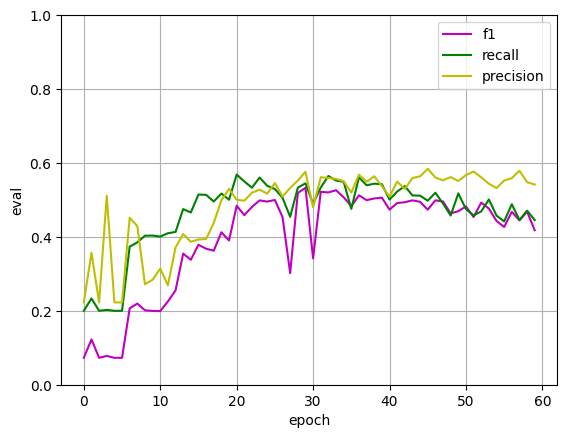

In [23]:
#学習曲線の描画

import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()#グラフの描画領域を作成

plt.plot(range(len(valid_eval_json_load["macro_valid_f1"])), valid_eval_json_load["macro_valid_f1"], 'm-', label='f1')
plt.plot(range(len(valid_eval_json_load["macro_valid_recall"])), valid_eval_json_load["macro_valid_recall"], 'g-', label='recall')
plt.plot(range(len(valid_eval_json_load["macro_valid_precision"])), valid_eval_json_load["macro_valid_precision"], 'y-', label='precision')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('eval')
plt.ylim(0, 1)
plt.grid()
print(len(valid_eval_json_load["macro_valid_f1"]))
valid_f1_max_epoch = np.argmax(valid_eval_json_load["macro_valid_f1"])

print("検証データのmacroF1の最高値のepochは", valid_f1_max_epoch)
print("評価値は",max(valid_eval_json_load["macro_valid_f1"]))

# 検証でのf1が最大となったepochのテストデータの評価値(f1,recall,precision)を出力

In [24]:
test_valid_max_epoch_cm = test_eval_json_load["cm"][valid_f1_max_epoch]

recall, precision, f1, accuracy = evaluation(test_valid_max_epoch_cm)

print("macro_f1:{}".format(np.mean(f1)))
f1 = [round(x, 3) for x in f1]
print(f1)

print("macro_recall:{}".format(np.mean(recall)))
recall = [round(x, 3) for x in recall]
print(recall)

print("macro_precision:{}".format(np.mean(precision)))
precision = [round(x, 3) for x in precision]
print(precision)

macro_f1:0.5049060393170063
[0.346, 0.567, 0.66, 0.702, 0.249]
macro_recall:0.5166547134568116
[0.236, 0.658, 0.774, 0.649, 0.266]
macro_precision:0.5442240892067589
[0.649, 0.499, 0.574, 0.764, 0.235]


# テストデータに対する評価値(f1,recall,precision)の推移

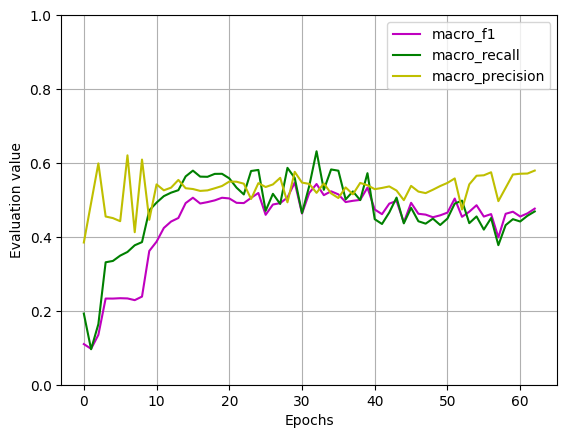

In [ ]:
fig=plt.figure()#グラフの描画領域を作成

plt.plot(range(len(test_eval_json_load["macro_test_f1"])), test_eval_json_load["macro_test_f1"], 'm-', label='macro_f1')
plt.plot(range(len(test_eval_json_load["macro_test_recall"])), test_eval_json_load["macro_test_recall"], 'g-', label='macro_recall')
plt.plot(range(len(test_eval_json_load["macro_test_precision"])), test_eval_json_load["macro_test_precision"], 'y-', label='macro_precision')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Evaluation value')
plt.ylim(0, 1)
plt.grid()

fig.savefig("./論文グラフ/data_k-{}-{}.png".format(log_data["data_k"], log_data["model_type"]))

# 推定結果を画像として出力

In [ ]:
#推論
import json
from torch.utils.data import DataLoader
import cv2
import re

pred_dataset = {}


re_model_name = "RFEN_7_3_45_proposal_B"

pred_data_path = "./log/{}/test_log/pred_dataset.json".format(re_model_name)

np.set_printoptions(threshold=1000000)

model = Risk_Facter_Estimation_Network().to(device)

data_path = "./dataset/split_id_data{}/test_data.json".format(data_k)

#if data_k == "many":
        #data_path = "./dataset/many_obj_data/test_data.json"
        
all_data_json = open(data_path, 'r')
all_data = json.load(all_data_json)

model_dir = re_model_name

model_weight_folder_name = model_dir.split("/")[-1]

weight_path = model_weight_folder_name.split("_")[-2:]
model_path = "./log/{}/model_weight/{}_{}_{}.pt".format(model_weight_folder_name, weight_path[0], weight_path[1], valid_f1_max_epoch + 1)

name_list = model_weight_folder_name.split("_")

model_kinds = re.sub(f'[0-9]', '', name_list[4])

model_name = str(model_kinds) + str(name_list[5])
print(model_name)
save_dir = "./output/output_test_data/{}/".format(model_weight_folder_name)
save_dir_sig = "./output/output_test_data_sig/{}/".format(model_weight_folder_name)
save_dir_att = "./output/output_test_data_att/{}/".format(model_weight_folder_name)

if os.path.isdir(save_dir) == False:
        os.mkdir(save_dir)
        os.mkdir(save_dir_sig)
        os.mkdir(save_dir_att)

BATCH_SIZE = 8

log_data_json = open("./log/{}/log.json".format(model_weight_folder_name), "r")
log_data = json.load(log_data_json)

all_dataset = MyDataset(all_data)
all_dataloader = DataLoader(all_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn)

test_model=torch.load(model_path)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')    
test_model.to(device)

test_model.eval()

font = cv2.FONT_HERSHEY_SIMPLEX

def min_max(x, axis=None):
    min = x.min(axis=axis, keepdims=True)
    max = x.max(axis=axis, keepdims=True)
    result = (x-min)/(max-min)
    return result

def att_vis(att, one_img_box_pos, type):

        #運転シーンの画像パッチのattention_weight
        patch_size = (224//16, 224//16)

        all_box_att_map = []
        for one_box_index in range(len(one_img_box_pos)):
                all_box_att_map.append(np.zeros((740,1000)))
                
        if type != "proposalA":
                for one_box_index in range(len(one_img_box_pos)):
                        vertical_patch_array = []
                        for y in range(patch_size[0]):
                            horizon_patch_array = []
                            for x in range(patch_size[1]):
                                one_patch_array = np.full((16,16),float(att[0][one_box_index][20 + x + (y * patch_size[0])] ))
                                horizon_patch_array.append(one_patch_array)
                            horizon_patch_array = np.hstack(horizon_patch_array)
                            vertical_patch_array.append(horizon_patch_array)
                        patch_array = np.vstack(vertical_patch_array)
                        
                        patch_array = cv2.resize(patch_array, (1000, 740))
                        
                        all_box_att_map[one_box_index] = patch_array

                #for box_index in range(len(all_box_att_map)):
                        #all_box_att_map[box_index] = min_max(all_box_att_map[box_index])
        
        #物体についてのattention_weight
        one_img_all_box_pos = [[int(element) for element in row] for row in one_img_box_pos]
        #print(one_img_all_box_pos)#[[655, 347, 751, 635], [458, 380, 478, 443]]
        for box_index in range(len(one_img_all_box_pos)):
            object_value_list = []
            object_pos_list = []
            for object_index in range(len(one_img_all_box_pos)):
                 obj_pos = [one_img_all_box_pos[object_index][3] - one_img_all_box_pos[object_index][1], one_img_all_box_pos[object_index][2] - one_img_all_box_pos[object_index][0]]
                 object_pos_list.append(obj_pos)
                 object_value_list.append(float(att[0][box_index][object_index]))

            object_value_list = min_max(np.array(object_value_list))
            for object_index in range(len(one_img_all_box_pos)):
                 obj_att_array = np.full(object_pos_list[object_index], float(object_value_list[object_index]))
                 all_box_att_map[box_index][one_img_all_box_pos[object_index][1]:one_img_all_box_pos[object_index][3], one_img_all_box_pos[object_index][0]:one_img_all_box_pos[object_index][2]] += obj_att_array
                 all_box_att_map[box_index] = min_max(all_box_att_map[box_index])
        
        return all_box_att_map
        


for batch, (IMAGE, PAST_IMAGE, INFO, GT) in enumerate(all_dataloader):
        
        mode = "test"
        if model_name == "proposalA" or model_name == "proposalB" or model_name == "proposalC":
                pred, att = test_model(IMAGE, PAST_IMAGE,INFO, mode)
                
        else:
                pred = test_model(IMAGE, PAST_IMAGE, INFO, mode)

        
        for one_image in range(len(pred)):
                
                #print(pred[one_image])
                one_image_risk_list = []
                #画像の読み込み
                imgfile="./dataset/drama_image/"+str(INFO[one_image][1])+'.jpg'
                print(str(INFO[one_image][1]),"id")
                img = cv2.imread(imgfile)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.copyMakeBorder(img, 0, 0, 0, 300, cv2.BORDER_CONSTANT, value=[255,255,255])
                
                img_sig = cv2.imread(imgfile)
                img_sig = cv2.cvtColor(img_sig, cv2.COLOR_BGR2RGB)
                img_sig = cv2.copyMakeBorder(img_sig, 0, 0, 0, 300, cv2.BORDER_CONSTANT, value=[255,255,255])
                
                img_att = cv2.imread(imgfile)
                img_att = cv2.cvtColor(img_att, cv2.COLOR_BGR2RGB)
                
                #物体の座標情報読み込み
                one_img_box_pos = INFO[one_image][0]
                
                #予測結果の加工
                one_pre = labeling(pred[one_image])
                
                one_pre_sig = torch.round(F.sigmoid(pred[one_image]), decimals=2)
                
                #正解データの読み込み
                one_gt = GT[one_image]
                target_obj_GT_index = len(one_gt)
                
                one_pre = one_pre[0:target_obj_GT_index].to("cpu")
                one_pre_sig = one_pre_sig[0:target_obj_GT_index].to("cpu")
                
                if model_name == "proposalA" or model_name == "proposalB" or model_name == "proposalC":
                        attentionmap_list = att_vis(att[one_image], one_img_box_pos, model_name)

                blend_img_list = []
                for box_id, one_box in enumerate(one_img_box_pos):
                        #print(one_pre[box_id])
                        one_image_risk = list(one_pre[box_id].detach().numpy())
                        one_image_risk = [int(x) for x in one_image_risk]
                        one_image_risk_list.append(one_image_risk)
                        
                        if all(x == 0 for x in one_pre[box_id]):
                                color = (0,0,255)
                        else:
                                color = (255,0,0)
                        
                        indices = [i + 1 for i, value in enumerate(one_pre[box_id].detach().numpy()) if value == 1]
                        print(indices)
                        txt = str(indices)
                        sig_list = one_pre_sig[box_id].detach().numpy()
                        txt_sig = str(sig_list)
                        print(txt_sig)
                        
                        cv2.rectangle(img, (int(one_box[0]), int(one_box[1])), (int(one_box[2]), int(one_box[3])), color , 2)
                        cv2.putText(img, str(box_id), (int(one_box[0]), int(one_box[1] - 2)), font, 1, (255, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                        cv2.putText(img, "id: "+str(box_id), (1025,50 + box_id * 70), font, 0.75, color, thickness=2, lineType=cv2.LINE_AA)
                        cv2.putText(img, str(txt), (1100, 50 + box_id * 70), font, 1, color, thickness=2, lineType=cv2.LINE_AA)
                        for num, i in enumerate(indices):
                                cv2.putText(img, str(sig_list[i - 1]), (1110 + (num * 44), 75 + box_id * 70), font, 0.5, (0,0,0), thickness=1, lineType=cv2.LINE_AA)
                        
                        cv2.rectangle(img_sig, (int(one_box[0]), int(one_box[1])), (int(one_box[2]), int(one_box[3])), color , 2)
                        cv2.putText(img_sig, str(box_id), (int(one_box[0]), int(one_box[1] - 2)), font, 1, (255, 255, 0), thickness=1, lineType=cv2.LINE_AA)
                        cv2.putText(img_sig, "id:"+str(box_id), (1000,50 + box_id * 70), font, 0.75, color, thickness=2, lineType=cv2.LINE_AA)
                        cv2.putText(img_sig, str(txt_sig), (1050, 50 + box_id * 70), font, 0.5, color, thickness=2, lineType=cv2.LINE_AA)
                        
                        if model_name == "proposalA" or model_name == "proposalB" or model_name == "proposalC":
                                map = attentionmap_list[box_id] * 255.
                                map = map.astype(np.uint8)# 1つの運転シーンのパッチについてのattention_mapを得る

                                heatmap = cv2.applyColorMap(map, cv2.COLORMAP_JET)
                                alpha = 0.5
                                
                                heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
                                heatmap = cv2.blur(heatmap, (25, 25))

                                blended = cv2.addWeighted(img_att, alpha, heatmap, 1 - alpha, 0)
                                blended = cv2.copyMakeBorder(blended, 0, 0, 0, 300, cv2.BORDER_CONSTANT, value=[255,255,255])

                                
                                for box_id2, one_box2 in enumerate(one_img_box_pos):
                                        
                                        if all(x == 0 for x in one_pre[box_id2]):
                                                color = (0,0,255)
                                                thick = 1
                                                if box_id == box_id2:
                                                       color = (247, 74, 36) 
                                                       thick = 3
                                        else:
                                                color = (255,0,0)
                                                thick = 1
                                                if box_id == box_id2:
                                                       color = (247, 74, 36) 
                                                       thick = 3
                                        indices = [i + 1 for i, value in enumerate(one_pre[box_id2].detach().numpy()) if value == 1]
                                        txt = str(indices)
                                        sig_list = one_pre_sig[box_id2].detach().numpy()
                                        txt_sig = str(sig_list)
                                        
                                        cv2.rectangle(blended, (int(one_box2[0]), int(one_box2[1])), (int(one_box2[2]), int(one_box2[3])), color , thick)
                                        cv2.putText(blended, str(box_id2), (int(one_box2[0]), int(one_box2[1] - 2)), font, 1, (255, 255, 0), thickness=1, lineType=cv2.LINE_AA)
                                        cv2.putText(blended, "id:"+str(box_id2), (1025,50 + box_id2 * 70), font, 0.75, color, thickness=2, lineType=cv2.LINE_AA)
                                        cv2.putText(blended, str(txt), (1100, 50 + box_id2 * 70), font, 1, color, thickness=2, lineType=cv2.LINE_AA)
                                        for num, i in enumerate(indices):
                                                cv2.putText(blended, str(sig_list[i - 1]), (1110 + (num * 44), 75 + box_id2 * 70), font, 0.5, (0,0,0), thickness=1, lineType=cv2.LINE_AA)
                                        
                                blended = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)  
                                blend_img_list.append(blended)
        
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img_sig = cv2.cvtColor(img_sig, cv2.COLOR_BGR2RGB)
                
                cv2.imwrite(f"./output/output_test_data/{model_weight_folder_name}/{str(INFO[one_image][1])}.jpg".format(),img)
                cv2.imwrite(f"./output/output_test_data_sig/{model_weight_folder_name}/{str(INFO[one_image][1])}.jpg",img_sig)
                if model_name == "proposalA" or model_name == "proposalB" or model_name == "proposalC":
                        for object_id in range(len(blend_img_list)):
                                save_each_obj_path = "./output/output_test_data_att/{}/{}".format(model_weight_folder_name, str(INFO[one_image][1]))
                                if os.path.isdir(save_each_obj_path) == False:
                                        os.mkdir(save_each_obj_path)
                                cv2.imwrite(save_each_obj_path + "/{}.jpg".format(object_id),  blend_img_list[object_id])

                pred_dataset[str(INFO[one_image][1])] = one_image_risk_list
        
print(f"./output/output_test_data/{model_weight_folder_name}/" + "に保存しました")
print(f"./output/output_test_data_sig/{model_weight_folder_name}/" + "に保存しました")

with open(pred_data_path, 'w') as f:
    json.dump(pred_dataset, f, ensure_ascii=False)

proposalB
out
100 id
[1, 2, 3, 5]
[0.77 0.78 0.84 0.01 0.59]
101 id
[1, 2, 3, 5]
[0.74 0.83 0.95 0.01 0.67]
[2, 3]
[0.02 0.98 0.79 0.   0.28]
[1, 2, 3, 5]
[0.53 0.69 0.77 0.15 0.66]
1015 id
[2]
[0.01 0.51 0.01 0.01 0.23]
[4, 5]
[0.49 0.05 0.01 0.97 0.55]
[]
[0.06 0.41 0.02 0.03 0.24]
104 id
[2]
[0.01 0.78 0.38 0.   0.1 ]
[2]
[0.15 0.79 0.38 0.02 0.29]
[2]
[0.12 0.53 0.22 0.   0.05]
[1, 2, 3, 5]
[0.52 0.76 0.71 0.04 0.53]
1051 id
[]
[0.05 0.24 0.09 0.06 0.5 ]
[2, 5]
[0.06 0.92 0.07 0.1  0.89]
[2, 5]
[0.03 0.88 0.06 0.02 0.78]
[2, 5]
[0.02 0.74 0.02 0.02 0.56]
[]
[0.03 0.04 0.03 0.   0.01]
[4]
[0.43 0.01 0.   0.99 0.15]
107 id
[2, 3]
[0.19 0.91 0.77 0.   0.4 ]
[1, 3]
[0.72 0.49 0.56 0.01 0.2 ]
1085 id
[]
[0.   0.27 0.03 0.   0.04]
[]
[0.02 0.43 0.03 0.01 0.06]
[5]
[0.03 0.33 0.13 0.14 0.84]
[]
[0.09 0.27 0.1  0.12 0.39]
1087 id
[]
[0.09 0.2  0.22 0.   0.02]
[1, 3]
[0.79 0.27 0.83 0.02 0.5 ]
[1, 3, 5]
[0.67 0.41 0.68 0.08 0.57]
[1, 3, 5]
[0.79 0.39 0.72 0.12 0.63]
out
1091 id
[]
[0.13 0.2